In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Always begin by importing the Python packages that you intend to use. All the functions and classes within Numpy is now accessible through the np.function_name() namespace.

Namespaces help prevent conflicts between two packages having functions of the same name. Avoid "star" imports for cleaner and error free code!

AVOID THIS!

from numpy import *

### Vectorized operations in Numpy

As we saw earlier, the pure Python way of doing things is slow. How do we carry out numerical operations using Numpy's fast and optimized functionality?

Below is an example of evaluating the derivative of $y = x^2$ numerically. We know that the derivative should theoretically be: $$\frac{d(y)}{dx} = 2x$$

To evaluate this numerically, we create an array, $x_i = x_0, x_1, x_2,..., x_N$, and compute the numerical derivative using backward differencing: $$\frac{\Delta{x_i^2}}{\Delta x} = \frac{(x_i^2 - x_{i-1}^2)}{(x_i - x_{i-1})}$$

In [3]:
x = np.arange(0, 5, 1) # try reducing the step size and see what happens below
y = x**2
dy_dx_analytical = 2*x

dy_dx_numerical = np.full_like(x, np.nan)

dy_dx_numerical[1:] = (y[1:] - y[0:-1]) / (x[1:] - x[:-1]) #backward difference using slices
dy_dx_numerical[0] = dy_dx_numerical[1]

dy_dx_np = np.gradient(y, 1)

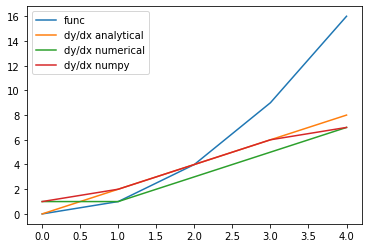

In [4]:
plt.plot(x,y, label="func")

plt.plot(x, dy_dx_analytical, label="dy/dx analytical")

plt.plot(x, dy_dx_numerical, label="dy/dx numerical")

plt.plot(x, dy_dx_np, label="dy/dx numpy")

plt.legend()

Try increasing the resolution along the X axis above. You can do that by reducing the step size in the np.arange function. Higher resolution will give a better match between the analytical and numerical derivatives. Notice how we are able to carry out the numerical differencing operations without using any loops. This is critical if you want the speed optimization that comes with the numpy packages. Using loops will push the entire operation into pure Python where type checking overheads will cause a massive bottleneck in the computation.

Can you see how to perform discretized operations on arrays using Numpy?

### A few useful functions in Numpy

In [42]:
x = np.random.randn(10)

In [46]:
x

array([ 0.44710961,  1.2065649 ,  1.7431134 ,  0.43946916,  0.03070976,
       -0.08270108, -0.54561796, -0.07305128,  0.74782147,  0.21205598])

In [52]:
x[0] = np.nan

In [53]:
x

array([        nan,  1.2065649 ,  1.7431134 ,  0.43946916,  0.03070976,
       -0.08270108, -0.54561796, -0.07305128,  0.74782147,  0.21205598])

In [57]:
np.nanmin(x)

-0.5456179616658272

In [45]:
np.argmin(x)

6

In [47]:
np.max(x)

1.7431133963485514

In [48]:
np.argmax(x)

2

In [55]:
np.nanmean(x)

0.4087071504541871

In [91]:
np.median(x)

-0.4019847114953725

In [51]:
np.quantile?

Signature:
np.quantile(
    a,
    q,
    axis=None,
    out=None,
    overwrite_input=False,
    interpolation='linear',
    keepdims=False,
)
Docstring:
Compute the q-th quantile of the data along the specified axis.

.. versionadded:: 1.15.0

Parameters
----------
a : array_like
    Input array or object that can be converted to an array.
q : array_like of float
    Quantile or sequence of quantiles to compute, which must be between
    0 and 1 inclusive.
axis : {int, tuple of int, None}, optional
    Axis or axes along which the quantiles are computed. The
    default is to compute the quantile(s) along a flattened
    version of the array.
out : ndarray, optional
    Alternative output array in which to place the result. It must
    have the same shape and buffer length as the expected output,
    but the type (of the output) will be cast if necessary.
overwrite_input : bool, optional
    If True, then allow the input array `a` to be modified by intermediate
    calculations, to s

In [49]:
np.quantile(x, 0.1)

-0.12899276505400237

In [50]:
np.quantile(x, 0.9)

1.2602197472024532

In [94]:
np.std(x)

0.5136153799663874

In [96]:
x[3] = np.nan

In [97]:
x

array([ 0.84567954,  0.37417799, -0.12054639,         nan, -0.51261056,
       -0.3233503 ,  0.53661086, -0.48061912, -0.53040862, -0.49186249])

In [98]:
np.mean(x)

nan

In [99]:
np.nanmean(x)

-0.0781032339440844

## Broadcasting in Numpy

In [62]:
x = np.arange(0, 10, 1)
c = 0.5
x*0.5

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [63]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
x * np.array([0.5])

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [126]:
print(x.shape)

(10,)


In [64]:
c = np.ones(10)*0.5

In [65]:
c

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [66]:
x*c

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [129]:
print(x.shape, c.shape)

(10,) (10,)


Have a look at the Numpy documentation on Broadcasting [here](https://numpy.org/doc/stable/user/basics.broadcasting.html).

> *When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when*

>> 1. *they are equal, or*
>> 1. *one of them is 1*


In [133]:
c = np.arange(0,1,0.1)

In [134]:
c

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [135]:
x*c

array([0. , 0.1, 0.4, 0.9, 1.6, 2.5, 3.6, 4.9, 6.4, 8.1])

In [71]:
x = x.reshape(5,2)

In [72]:
x

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [144]:
x.shape

(5, 2)

In [73]:
c = np.array([0.1, 0.5])

In [74]:
c.shape

(2,)

In [77]:
x * np.array([ [0.1, 0.5],
           [0.1, 0.5],
           [0.1, 0.5],
           [0.1, 0.5],
           [0.1, 0.5]])

array([[0. , 0.5],
       [0.2, 1.5],
       [0.4, 2.5],
       [0.6, 3.5],
       [0.8, 4.5]])

In [75]:
x*c

array([[0. , 0.5],
       [0.2, 1.5],
       [0.4, 2.5],
       [0.6, 3.5],
       [0.8, 4.5]])

In [152]:
c*x

array([[0. , 0.5],
       [0.2, 1.5],
       [0.4, 2.5],
       [0.6, 3.5],
       [0.8, 4.5]])

In [153]:
x = np.arange(1,28)

In [154]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [156]:
x = x.reshape(3,3,3)

In [157]:
x

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

In [161]:
c = np.array([[[0.1, 0.2, 0.5]]])

In [162]:
c.shape

(1, 1, 3)

In [163]:
x.shape

(3, 3, 3)

In [164]:
x*c

array([[[ 0.1,  0.4,  1.5],
        [ 0.4,  1. ,  3. ],
        [ 0.7,  1.6,  4.5]],

       [[ 1. ,  2.2,  6. ],
        [ 1.3,  2.8,  7.5],
        [ 1.6,  3.4,  9. ]],

       [[ 1.9,  4. , 10.5],
        [ 2.2,  4.6, 12. ],
        [ 2.5,  5.2, 13.5]]])

### Exercise 05: Numerically differentiate a 1D vector


1. Create a 1 dimensional vector, "x", ranging from $-2\pi$ to $+2\pi$, Hint: use np.pi
1. Compute y = sin(x), hint: use np.sin()
1. Compute the analytical solution for $\large{\frac{d (y)}{dx} =  cos(x)}$, call this dy_dx_analyt
1. Compute the numerical solution for the differentiation using backward difference: $\large{\frac{y_i - y_{i-1}}{\Delta x}}$, call this dy_dx_num
1. Bonus: plot these functions!

In [110]:
step_size = 1.0

In [128]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [130]:
np.linspace(-2*np.pi, 2*np.pi, 100)

array([-6.28318531, -6.15625227, -6.02931923, -5.9023862 , -5.77545316,
       -5.64852012, -5.52158709, -5.39465405, -5.26772102, -5.14078798,
       -5.01385494, -4.88692191, -4.75998887, -4.63305583, -4.5061228 ,
       -4.37918976, -4.25225672, -4.12532369, -3.99839065, -3.87145761,
       -3.74452458, -3.61759154, -3.4906585 , -3.36372547, -3.23679243,
       -3.10985939, -2.98292636, -2.85599332, -2.72906028, -2.60212725,
       -2.47519421, -2.34826118, -2.22132814, -2.0943951 , -1.96746207,
       -1.84052903, -1.71359599, -1.58666296, -1.45972992, -1.33279688,
       -1.20586385, -1.07893081, -0.95199777, -0.82506474, -0.6981317 ,
       -0.57119866, -0.44426563, -0.31733259, -0.19039955, -0.06346652,
        0.06346652,  0.19039955,  0.31733259,  0.44426563,  0.57119866,
        0.6981317 ,  0.82506474,  0.95199777,  1.07893081,  1.20586385,
        1.33279688,  1.45972992,  1.58666296,  1.71359599,  1.84052903,
        1.96746207,  2.0943951 ,  2.22132814,  2.34826118,  2.47

In [111]:
x = np.arange(-2*np.pi, 2*np.pi+0.000001, step_size)

In [123]:
delta_x = x[1] - x[0]

In [124]:
delta_x

1.0

In [112]:
y = np.sin(x)

In [113]:
dy_dx_analytical = np.cos(x)

In [114]:
N = x.shape[0]

In [125]:
dy_dx_numerical = (y[1: N] - y[0:N-1]) / delta_x

In [116]:
dy_dx_numerical.shape

(12,)

In [119]:
dy_dx_numpy = np.gradient(y, step_size)

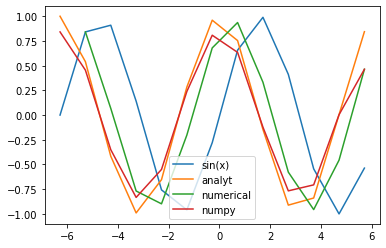

In [120]:
plt.plot(x, y, label="sin(x)")

plt.plot(x, dy_dx_analytical, label="analyt")
plt.plot(x[1:], dy_dx_numerical, label="numerical")

plt.plot(x, dy_dx_numpy, label="numpy")
plt.legend()

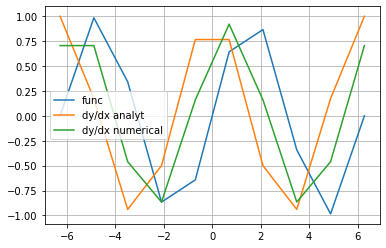

In [1]:
# # Solution

# import numpy as np
# import matplotlib.pyplot as plt

# x = np.linspace(-2*np.pi, 2*np.pi, 10)
# delta_x = x[1] - x[0]

# y = np.sin(x)
# dy_dx_analyt = np.cos(x)
# dy_dx_num = np.full_like(y, np.nan) # creates an array of the same size as y and fills it with NaNs
# dy_dx_num[1:] = (y[1:] - y[:-1])/delta_x
# dy_dx_num[0] = (y[1] - y[0]) / delta_x

# plt.plot(x, y, label="func")
# plt.plot(x, dy_dx_analyt, label="dy/dx analyt")
# plt.plot(x, dy_dx_num, label="dy/dx numerical")

# plt.legend()
# plt.grid()